
# MINERÍA DE DATOS



## Taller: Preprocesamiento

**Profesora:** Elizabeth León Guzmán

**Tema:** Preprocesamiento

**Entrega:** Entregar documento detallado del trabajo realizado y análisis respectivos.

**Equipo 4:** Paula Velosa- Johan Díaz- Fabián López  



## Actividades


In [1]:
import pandas as pd
import numpy as np


### 1. Normalización de datos


In [17]:
X = np.array([-5.0, 23.0, 17.6, 7.23, 1.11])

normalized_data = dict()


Dado un conjunto de datos de una dimensión
**X = {-5.0, 23.0, 17.6, 7.23, 1.11}**, normalizar usando:

* a) Min-max normalización en el intervalo \[0,1]


In [18]:
normalized_data["Min-max [0,1]"] = (X-X.min())/(X.max()-X.min())
normalized_data["Min-max [0,1]"]

array([0.        , 1.        , 0.80714286, 0.43678571, 0.21821429])

* b) Min-max normalización en el intervalo \[-1,1]


In [19]:
normalized_data["Min-max [-1,1]"] = 2*(X-X.min())/(X.max()-X.min())-1
normalized_data["Min-max [-1,1]"]

array([-1.        ,  1.        ,  0.61428571, -0.12642857, -0.56357143])

* c) Normalización usando desviación estándar


In [20]:
normalized_data["Desviación estándar"] = (X-X.mean())/X.std()
normalized_data["Desviación estándar"]

array([-1.33779582,  1.37893488,  0.85499396, -0.15116666, -0.74496637])

* d) Escala decimal en el intervalo \[-1,1]


In [21]:
normalized_data["Escala decimal"]=X/(X**(np.ceil(np.log10(X.max()))))
normalized_data["Escala decimal"]

array([-0.2       ,  0.04347826,  0.05681818,  0.13831259,  0.9009009 ])

* e) Comparar los resultados y discutir ventajas y desventajas


 
    - **a) Min-max normalización en el intervalo \[0, 1]**


        **Ventajas:**

        * Muy intuitivo y fácil de implementar.
        * Preserva la distribución de los datos linealmente.
        * Útil cuando se quiere que todos los valores estén en un rango fijo, como \[0,1] (por ejemplo, en redes neuronales con funciones de activación tipo sigmoide).

        **Desventajas:**

        * **Muy sensible a valores atípicos (outliers)**: un solo valor extremo puede distorsionar la escala de todo el conjunto.
        * No centra los datos alrededor de cero.


    - **b) Min-max normalización en el intervalo \[-1, 1]**


        **Ventajas:**

        * Igual que la anterior, pero ajustada a un rango simétrico respecto al cero.
        * Puede ser más adecuada si se espera que los modelos traten valores negativos y positivos por igual (por ejemplo, activaciones tipo tanh).

        **Desventajas:**

        * Igual que el método \[0,1]: sensible a outliers y no cambia la forma de la distribución.


    - **c) Normalización por desviación estándar (Z-score)**



        **Ventajas:**

        * Centra los datos en cero y escala en función de la desviación estándar.
        * **Menos afectada por outliers** que min-max (aunque no inmune).
        * Ideal para algoritmos que asumen una distribución normal (por ejemplo, regresión lineal, SVM, PCA).

        **Desventajas:**

        * No limita los valores a un rango fijo; valores extremos pueden mantenerse extremos.
        * Supone cierta simetría en los datos, lo que puede ser problemático si la distribución es muy sesgada.


    - **d) Escala decimal (decimal scaling)**


        **Ventajas:**

        * Muy simple y rápido de calcular.
        * Controla los valores para mantenerlos en el rango \[-1,1].

        **Desventajas:**

        * Solo se basa en la magnitud del valor máximo: **no considera la dispersión de los datos**.
        * Puede dar lugar a una escala demasiado "gruesa" si hay un único valor grande.
        * No centra los datos ni ajusta su distribución.



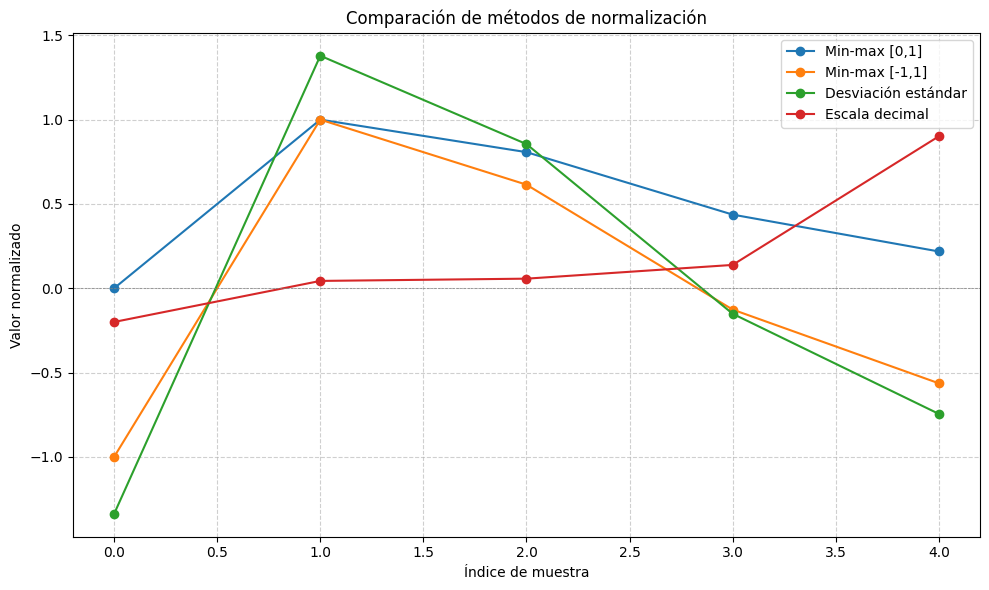

In [23]:
from matplotlib import pyplot as plt

plt.figure(figsize=(10, 6))
for k, d in normalized_data.items():
    plt.plot(d, marker='o', label=k)

plt.title("Comparación de métodos de normalización")
plt.xlabel("Índice de muestra")
plt.ylabel("Valor normalizado")
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

---

### 2. Valores perdidos

Dado un conjunto de datos de 4 dimensiones con valores perdidos:

```
I1 I2 I3 I4  
0  1  1  2  
2  1  ?  1  
1  ?  ?  0  
?  2  1  ?  
2  2  1  0
```


In [121]:
df = pd.DataFrame(dict(I1=[0,2,1,np.nan,2],I2=[1,1,np.nan,2,2],I3=[1,np.nan,np.nan,1,1],I4=[2,1,0,np.nan,0]))
df

,I1,I2,I3,I4
0,0.0,1.0,1.0,2.0
1,2.0,1.0,NaN,1.0
2,1.0,NaN,NaN,0.0
3,NaN,2.0,1.0,NaN
4,2.0,2.0,1.0,0.0



* a) Dado que el dominio para todos los atributos es \[0,1,2], ¿cuál debe ser el número de ejemplos “artificiales” si los valores perdidos son interpretados como “no importa el valor” y ellos son reemplazados con todos los posibles valores para su dominio?

    R/ Hay un total de 5 entradas faltantes. Si para cada una de esas entradas se generan 3 ejemplos artificales, 1 por cada valor del dominio tenemos un total de $5\times 3 =15$ ejemplos artificiales. El sigiente código genera estos ejemplos artificiales.


In [122]:
aux_df = df.isna().stack()
nans_pos = aux_df[aux_df].index

aux2_df = df.stack(dropna=False).astype("object")
for i in nans_pos:
    aux2_df[i] = [0,1,2]

aux2_df = aux2_df.unstack()

for col in df.columns:
    aux2_df = aux2_df.explode(col)
aux2_df.astype(int)

C:\Users\ACER\AppData\Local\Temp\ipykernel_16020\2719312791.py:4: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  aux2_df = df.stack(dropna=False).astype("object")


,I1,I2,I3,I4
0,0,1,1,2
1,2,1,0,1
1,2,1,1,1
1,2,1,2,1
2,1,0,0,0
2,1,0,1,0
2,1,0,2,0
2,1,1,0,0
2,1,1,1,0
2,1,1,2,0


* b) ¿Qué otro método utilizaría para reemplazar los valores perdidos?
    - Se pueden rellenar los valores faltantes con una medida de tendencia central de cada columna. Por ejemplo se puede rellenar con la mediana de cada columna.

In [124]:
df.fillna(df.median())

,I1,I2,I3,I4
0,0.0,1.0,1.0,2.0
1,2.0,1.0,1.0,1.0
2,1.0,1.5,1.0,0.0
3,1.5,2.0,1.0,0.5
4,2.0,2.0,1.0,0.0



---

### 3. Outliers en número de hijos

El número de hijos de diferentes pacientes es dado por el siguiente vector:
**C = {3, 1, 0, 2, 7, 3, 6, 4, -2, 0, 0, 10, 15, 6}**


In [111]:
C = np.array([3, 1, 0, 2, 7, 3, 6, 4, -2, 0, 0, 10, 15, 6])


* a) Encontrar outliers usando parámetros estadísticos estándar: media y varianza

    R/ No hay outliers usando el criterio de 3 desviaciones estandar.


In [112]:
C_normalized = (C-C.mean())/C.std()
C_normalized

array([-0.21030754, -0.66327761, -0.88976265, -0.43679257,  0.69563262,
       -0.21030754,  0.46914758,  0.0161775 , -1.34273272, -0.88976265,
       -0.88976265,  1.37508773,  2.50751292,  0.46914758])

In [113]:
C[abs(C_normalized)>3]

array([], dtype=int64)

* b) Si el umbral cambia de ±3 desviaciones estándar a ±2 desviaciones estándar, ¿cuál “outlier adicional” se encuentra?

    R/ Se encuentra que _15_ es un outlier bajo el nuevo criterio.


In [114]:
C[abs(C_normalized)>2]

array([15])


---

### 4. Detección de outliers multivariados

Dado un conjunto de tres dimensiones:

```
X = [{1,2,0},{3,1,4},{2,1,5},{0,1,6},{2,4,3},{4,4,2},{5,2,1},{7,7,7},{0,0,0},{3,3,3}]
```


In [115]:
X = np.array([[1,2,0],[3,1,4],[2,1,5],[0,1,6],[2,4,3],[4,4,2],[5,2,1],[7,7,7],[0,0,0],[3,3,3]])
X

array([[1, 2, 0],
       [3, 1, 4],
       [2, 1, 5],
       [0, 1, 6],
       [2, 4, 3],
       [4, 4, 2],
       [5, 2, 1],
       [7, 7, 7],
       [0, 0, 0],
       [3, 3, 3]])


* a) Describir el procedimiento e interpretar los resultados de detección de outliers basado en la media y varianza

    Se propone realizar PCA de un único componente tal que sobre este se puedan aplicar una técninca unidimensional de detección de outliers.


In [116]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
x_pca = pca.fit_transform(X)

x_pca


array([[-3.01860763],
       [-0.19030271],
       [-0.24505936],
       [-0.903921  ],
       [ 0.38813939],
       [ 1.04700104],
       [-0.05283928],
       [ 7.33795324],
       [-4.7773096 ],
       [ 0.41494591]])

In [117]:
x_pca_normalized = (x_pca-x_pca.mean())/x_pca.std()
x_pca_normalized

array([[-1.01690579],
       [-0.064109  ],
       [-0.08255537],
       [-0.30451209],
       [ 0.13075604],
       [ 0.35271276],
       [-0.01780045],
       [ 2.47200301],
       [-1.60937571],
       [ 0.1397866 ]])

Sobre nuestros nuevos datos unidimensionales realizamos detección de outliers mediante desviación estándar. El criterio será **más de 2 desviaciones estándar**.

In [118]:
x_pca_normalized_br,_ = np.broadcast_arrays(x_pca_normalized,X)

X[(abs(x_pca_normalized_br)>2)]

array([7, 7, 7])


---

### 5. Weka: valores perdidos, normalización y discretización

Usar el conjunto de datos *iris* en Weka:

* a) Eliminar manualmente valores (15%) en sus atributos para simular valores perdidos. Luego aplicar varios métodos disponibles en Weka para reemplazar esos valores. Discutir:

  * Diferencias entre el valor real y el que lo reemplaza
  * Diferencias entre los métodos
* b) Normalizar usando varios métodos
* c) Discretizar usando varios métodos



---

### 6. Reducción por binning

Dado el conjunto de datos:

```
I1  I2   I3  
1   5.9  3.4  
2   2.1  6.2  
1   1.6  2.8  
2   6.8  5.8  
1   3.1  3.1  
1   8.3  4.1  
2   2.4  5.0  
```

Realizar reducción de valores basado en la técnica de **binning** con el mejor corte:

* a) Dimensión I2 usando la **media** como representante de 2 bins
* b) Dimensión I3 usando el **límite más cercano** como representante de 2 bins
  *(Mostrar pasos)*



---

### 7. Ranking de dimensiones

Dado el conjunto de datos con tres dimensiones de entrada y una clase:

```
I1   I2   I3   C  
2.5  1.6  5.9  0  
7.2  4.3  2.1  1  
3.4  5.8  1.6  1  
5.6  3.6  6.8  0  
4.8  7.2  3.1  1  
8.1  4.9  8.3  0  
6.3  4.8  2.4  1  
```

* Realizar **ranking** de las dimensiones comparando medias y varianzas



---

### 8. Selección de características por entropía

Dado el conjunto de datos donde **X1** y **X2** son numéricas, y **X3** y **X4** categóricas:

```
X1  X2  X3  X4  
2.7 3.4 1   A  
3.1 6.2 2   A  
4.5 2.8 1   B  
5.3 5.8 2   B  
6.6 3.1 1   A  
5.0 4.1 2   B  
```

* a) Aplicar el método de **selección de características basado en entropía** para reducir una dimensión (mostrar pasos)
* b) Implementar un programa para realizar el **ranking de dimensiones** usando entropía


### 8.a) Cálculo de ganancia de información (Information Gain)

In [ ]:
import pandas as pd
import numpy as np

# 1. Definir el DataFrame
data = {
    'X1': [2.7, 3.1, 4.5, 5.3, 6.6, 5.0],
    'X2': [3.4, 6.2, 2.8, 5.8, 3.1, 4.1],
    'X3': [1,   2,   1,   2,   1,   2],
    'X4': ['A', 'A', 'B', 'B', 'A', 'B']
}
df = pd.DataFrame(data)

# 2. Función para calcular la entropía de una serie
def entropy(labels: pd.Series) -> float:
    p = labels.value_counts(normalize=True)
    return -np.sum(p * np.log2(p))

# 3. Entropía del objetivo (X4)
H_Y = entropy(df['X4'])

# 4. Para cada característica, calcular la entropía condicional y la ganancia de información
features = ['X1', 'X2', 'X3']
info_gain = {}

for feat in features:
    # 4.a) Si es continua (X1, X2), primero discretizamos en 2 bins
    if feat in ['X1', 'X2']:
        bins = pd.qcut(df[feat], q=2, labels=False)
        df[f'{feat}_bin'] = bins
        groups = df[f'{feat}_bin']
    else:
        groups = df[feat]
    
    # 4.b) Entropía condicional H(Y|feat)
    H_Y_given_feat = 0.0
    for val, subset in df.groupby(groups)['X4']:
        H_Y_given_feat += (len(subset) / len(df)) * entropy(subset)
    
    # 4.c) Ganancia de información
    info_gain[feat] = H_Y - H_Y_given_feat

# Mostrar resultados
print("Entropía de X4 (objetivo):", H_Y)
print("\nGanancia de información por característica:")
for feat, ig in info_gain.items():
    print(f"  - {feat}: {ig:.4f}")

Entropía de X4 (objetivo): 1.0

Ganancia de información por característica:
  - X1: 0.0817
  - X2: 0.0817
  - X3: 0.0817


### 8.b) Ranking de características y reducción


In [ ]:
# 5. Ordenar las características por IG descendente
ranking = sorted(info_gain.items(), key=lambda x: x[1], reverse=True)
print("\nRanking de características (descendente por IG):")
for feat, ig in ranking:
    print(f"  {feat}: {ig:.4f}")

# 6. Reducir una dimensión: eliminar la de IG más baja
to_drop = ranking[-1][0]
print(f"\nCaracterísticas a conservar: {[f for f, _ in ranking[:-1]]}")
print(f"Características eliminadas: {to_drop}")


Ranking de características (descendente por IG):
  X1: 0.0817
  X2: 0.0817
  X3: 0.0817

Características a conservar: ['X1', 'X2']
Características eliminadas: X3



---

### 9. Transformación de atributos en *Adult dataset*

Aplicar al conjunto de datos *Adult* del repositorio de Machine Learning:

* a) Convertir todos los atributos numéricos a categóricos utilizando dos estrategias diferentes
* b) Transformar el conjunto de datos para que **todos los atributos sean numéricos**


In [10]:
from sklearn.preprocessing import OrdinalEncoder

# 1. Cargar el dataset Adult (asegúrate de tener 'adult.data' en el mismo directorio)
column_names = [
    'age','workclass','fnlwgt','education','education_num','marital_status',
    'occupation','relationship','race','sex','capital_gain','capital_loss',
    'hours_per_week','native_country','income'
]
adult = pd.read_csv('adult/adult.data', names=column_names, na_values=' ?')

# 2. Identificar columnas numéricas
num_cols = adult.select_dtypes(include=['int64','float64']).columns.tolist()

### a) Estrategia 1: Equal-width binning en 3 bins

In [11]:
# 3.a) Estrategia 1: Equal-width binning en 3 bins
adult_eq_width = adult.copy()
for col in num_cols:
    adult_eq_width[col] = pd.cut(adult_eq_width[col], bins=3, labels=False)

### b) Estrategia 2: Equal-frequency binning en 4 bins

In [12]:
# 3.b) Estrategia 2: Equal-frequency binning en 4 bins
adult_eq_freq = adult.copy()
for col in num_cols:
    adult_eq_freq[col] = pd.qcut(adult_eq_freq[col], q=4, labels=False, duplicates='drop')

In [13]:
# 4) Transformación completa a numérico (ordinal encoding de categóricas)
adult_numeric = adult.copy()
cat_cols = adult_numeric.select_dtypes(include=['object']).columns.tolist()
encoder = OrdinalEncoder()
adult_numeric[cat_cols] = encoder.fit_transform(adult_numeric[cat_cols].fillna('Missing'))


In [14]:
#Resultados
print("== Equal-width ==")
display(adult_eq_width.head())

print("== Equal-frequency ==")
display(adult_eq_freq.head())

print("== Todos numéricos ==")
display(adult_numeric.head())

== Equal-width ==


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0,State-gov,0,Bachelors,2,Never-married,Adm-clerical,Not-in-family,White,Male,0,0,1,United-States,<=50K
1,1,Self-emp-not-inc,0,Bachelors,2,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,0,United-States,<=50K
2,0,Private,0,HS-grad,1,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,1,United-States,<=50K
3,1,Private,0,11th,1,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,1,United-States,<=50K
4,0,Private,0,Bachelors,2,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,1,Cuba,<=50K


== Equal-frequency ==


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,2,State-gov,0,Bachelors,3,Never-married,Adm-clerical,Not-in-family,White,Male,0,0,0,United-States,<=50K
1,3,Self-emp-not-inc,0,Bachelors,3,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,0,United-States,<=50K
2,2,Private,2,HS-grad,0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,0,United-States,<=50K
3,3,Private,2,11th,0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,0,United-States,<=50K
4,0,Private,3,Bachelors,3,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,0,Cuba,<=50K


== Todos numéricos ==


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,6.0,77516,9.0,13,4.0,0.0,1.0,4.0,1.0,2174,0,40,38.0,0.0
1,50,5.0,83311,9.0,13,2.0,3.0,0.0,4.0,1.0,0,0,13,38.0,0.0
2,38,3.0,215646,11.0,9,0.0,5.0,1.0,4.0,1.0,0,0,40,38.0,0.0
3,53,3.0,234721,1.0,7,2.0,5.0,0.0,2.0,1.0,0,0,40,38.0,0.0
4,28,3.0,338409,9.0,13,2.0,9.0,5.0,2.0,0.0,0,0,40,4.0,0.0



---

### 10. PCA en conjunto de datos numéricos

Escoger un conjunto de datos del repositorio de Machine Learning que tenga varias dimensiones numéricas y aplicar **PCA**.

* Describir el nuevo conjunto de datos resultante

